**Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

# Display first 10 rows

# Summary statistics

# Distribution of each feature


# Pair plots to visualize relationships between price and every other feature


# Find Correlation matrix using heatmap


**Data Preprocessing**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values


# Feature scaling

# Feature engineering: price per square foot

# Split data


**Model Building & Hyperparameter Tuning**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Linear regression

# Regularized models (just as examples, hyperparameters can be tuned)


**Model Evaluation & Diagnostics**

In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluation metrics

# Residuals plot


# Actual vs. Predicted plot

In [8]:
# Load the dataset

df=pd.read_csv("house_prices.csv")

# Display first 10 rows

df.head(10)



,area,bedrooms,bathrooms,floors,price
0,1360,2,1,2,75561.009869
1,4272,3,3,1,197449.640308
2,3592,1,2,1,180621.795096
3,966,1,2,2,45234.416477
4,4926,2,1,2,232342.452693
5,3944,5,3,1,187987.324203
6,3671,1,2,1,182560.239077
7,3419,1,1,1,181389.632565
8,630,3,3,1,25070.420087
9,2185,4,2,2,121483.813999


In [9]:
# Summary statistics
df.describe(include='all')


,area,bedrooms,bathrooms,floors,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2815.422000,2.990000,1.973000,1.489000,141138.789936
std,1255.514921,1.427564,0.820332,0.500129,63233.613042
min,503.000000,1.000000,1.000000,1.000000,7243.014853
25%,1749.500000,2.000000,1.000000,1.000000,88009.083503
50%,2862.500000,3.000000,2.000000,1.000000,141225.486263
75%,3849.500000,4.000000,3.000000,2.000000,191752.725820
max,4999.000000,5.000000,3.000000,2.000000,267776.513729


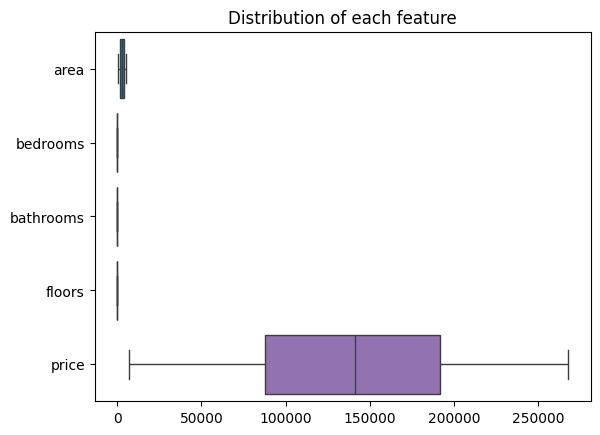

<Axes: ylabel='count'>

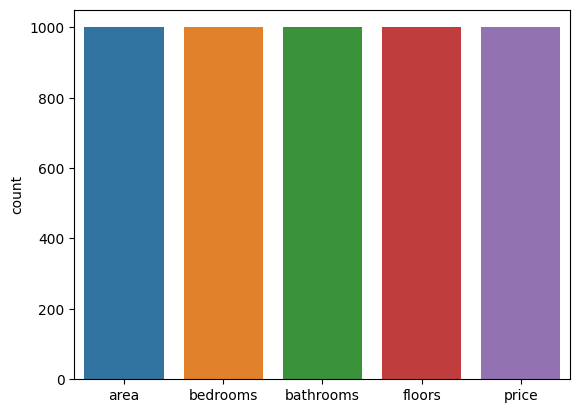

In [14]:
# Distribution of each feature

plt.title("Distribution of each feature")

sns.boxplot(data=df,orient="h")

plt.show()
sns.countplot(data=df)



In [15]:
# Pair plots to visualize relationships between price and every other feature

df.columns




Index(['area', 'bedrooms', 'bathrooms', 'floors', 'price'], dtype='object')

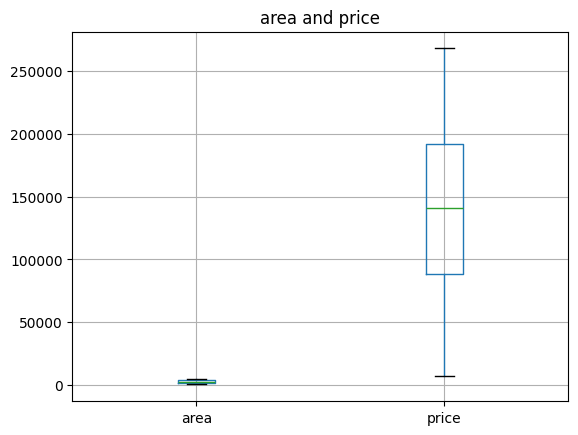

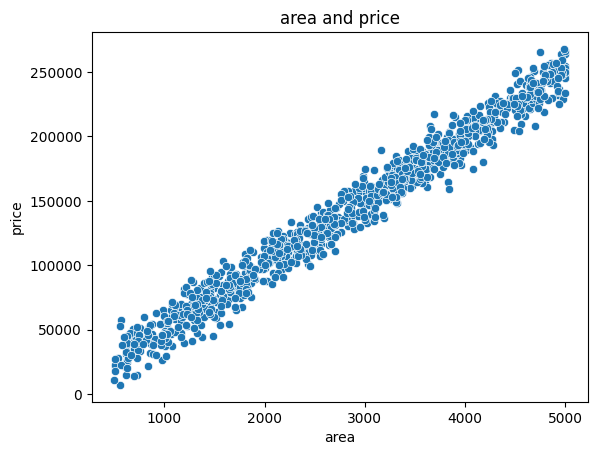

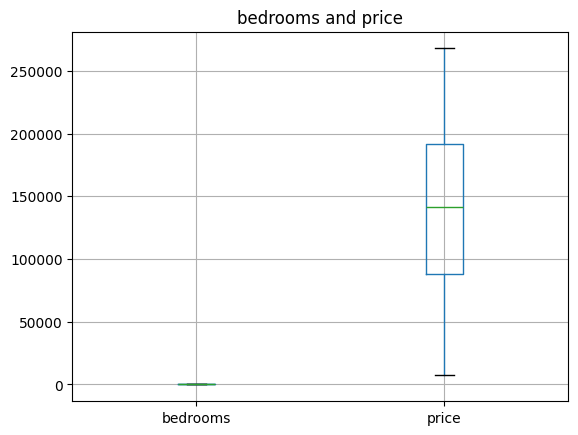

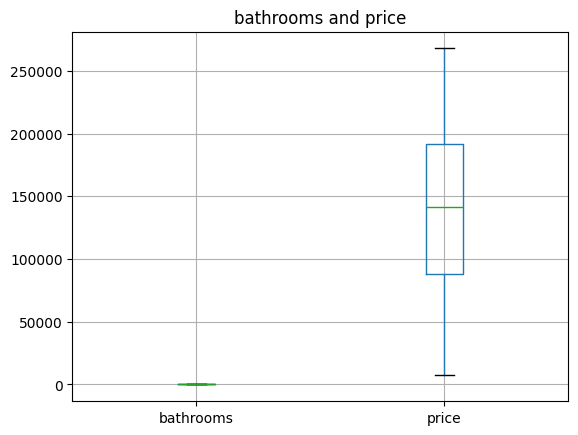

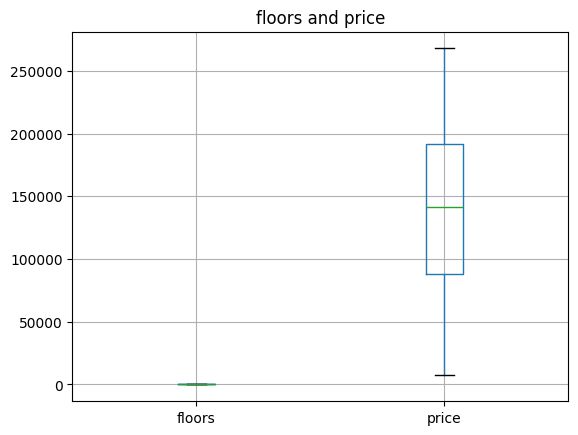

In [28]:
# Pair plots to visualize relationships between price and every other feature

plt.title("area and price")
df.boxplot(column=['area','price'])

plt.show()
plt.title("area and price")
sns.scatterplot(x='area',y='price',data=df)
plt.show()
plt.title("bedrooms and price")
df.boxplot(column=['bedrooms','price'])
plt.show()


plt.title("bathrooms and price")
df.boxplot(column=['bathrooms','price'])
plt.show()

plt.title("floors and price")
df.boxplot(column=['floors','price'])
plt.show()

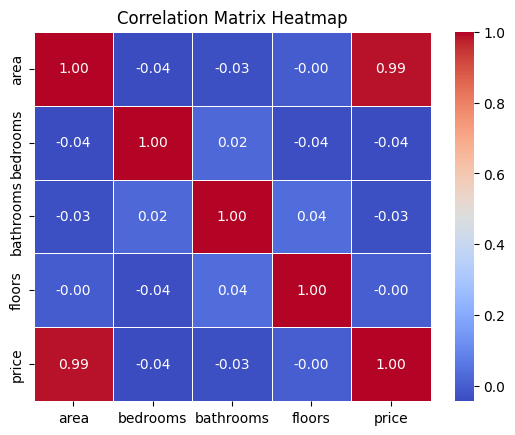

In [29]:
# Find Correlation matrix using heatmap

corelation_matrix=df.corr()

sns.heatmap(corelation_matrix,annot=True,cmap="coolwarm", fmt=".2f", linewidths=.5)

# Display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [30]:
# Check for missing values

df.isnull().sum()




area         0
bedrooms     0
bathrooms    0
floors       0
price        0
dtype: int64

In [31]:
# Feature scaling

scaller=StandardScaler()

columns_scale=['area', 'bedrooms', 'bathrooms', 'floors']

df[columns_scale]=scaller.fit_transform(df[columns_scale])



In [33]:
# Feature engineering: price per square foot

df['price_per_sfoot']=df['price']/df['area']

df.head()



,area,bedrooms,bathrooms,floors,price,price_per_sfoot
0,-1.159803,-0.693836,-1.186699,1.022247,75561.009869,-65149.853065
1,1.160724,0.007008,1.252559,-0.978237,197449.640308,170108.973202
2,0.618843,-1.394681,0.032930,-0.978237,180621.795096,291870.158147
3,-1.473776,-1.394681,0.032930,1.022247,45234.416477,-30692.876727
4,1.681887,-0.693836,-1.186699,1.022247,232342.452693,138143.923056


In [35]:
# Split data

X=df[['area','bedrooms','bathrooms','floors']]
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
X_train

,area,bedrooms,bathrooms,floors
29,-0.627484,-0.693836,1.252559,1.022247
535,0.560670,1.408698,1.252559,1.022247
695,1.347992,-0.693836,1.252559,-0.978237
557,0.442731,0.707853,0.032930,1.022247
836,0.044289,1.408698,-1.186699,1.022247
...,...,...,...,...
106,-0.444998,1.408698,-1.186699,-0.978237
270,0.859502,0.007008,0.032930,-0.978237
860,-1.060990,1.408698,-1.186699,1.022247
435,-0.757377,0.707853,0.032930,-0.978237


In [43]:
# Linear regression

model=LinearRegression()

model=Ridge()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)



Mean Squared Error: 93342711.09785672
Coefficients: [ 6.22932980e+04 -1.06819633e+02 -3.30119153e+02  5.93503730e+01]
Intercept: 141359.1497816357


In [44]:
# Evaluation metrics

mae=mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error: {mae}')

r2score=r2_score(y_test,y_pred)
print(f'R-squared: {r2score}')






Mean Absolute Error: 7754.315244542479
R-squared: 0.9769514915923357


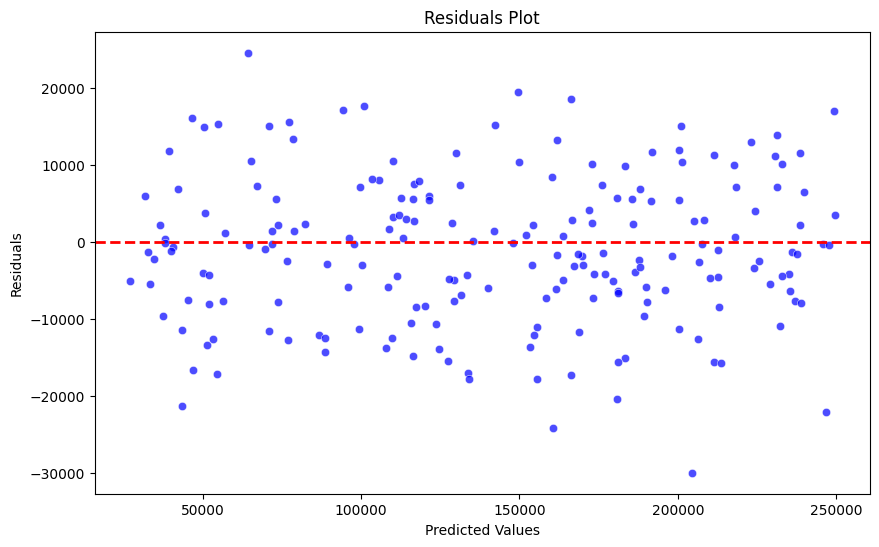

In [45]:
# Residuals plot(difference btw the predicted and actual values)
residuals = y_test - y_pred

# Create a residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


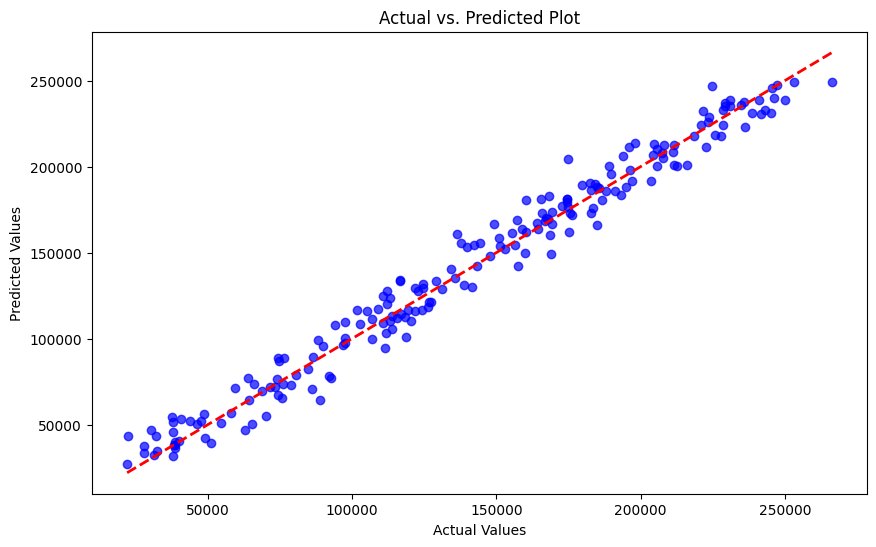

In [46]:
# Actual vs. Predicted plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

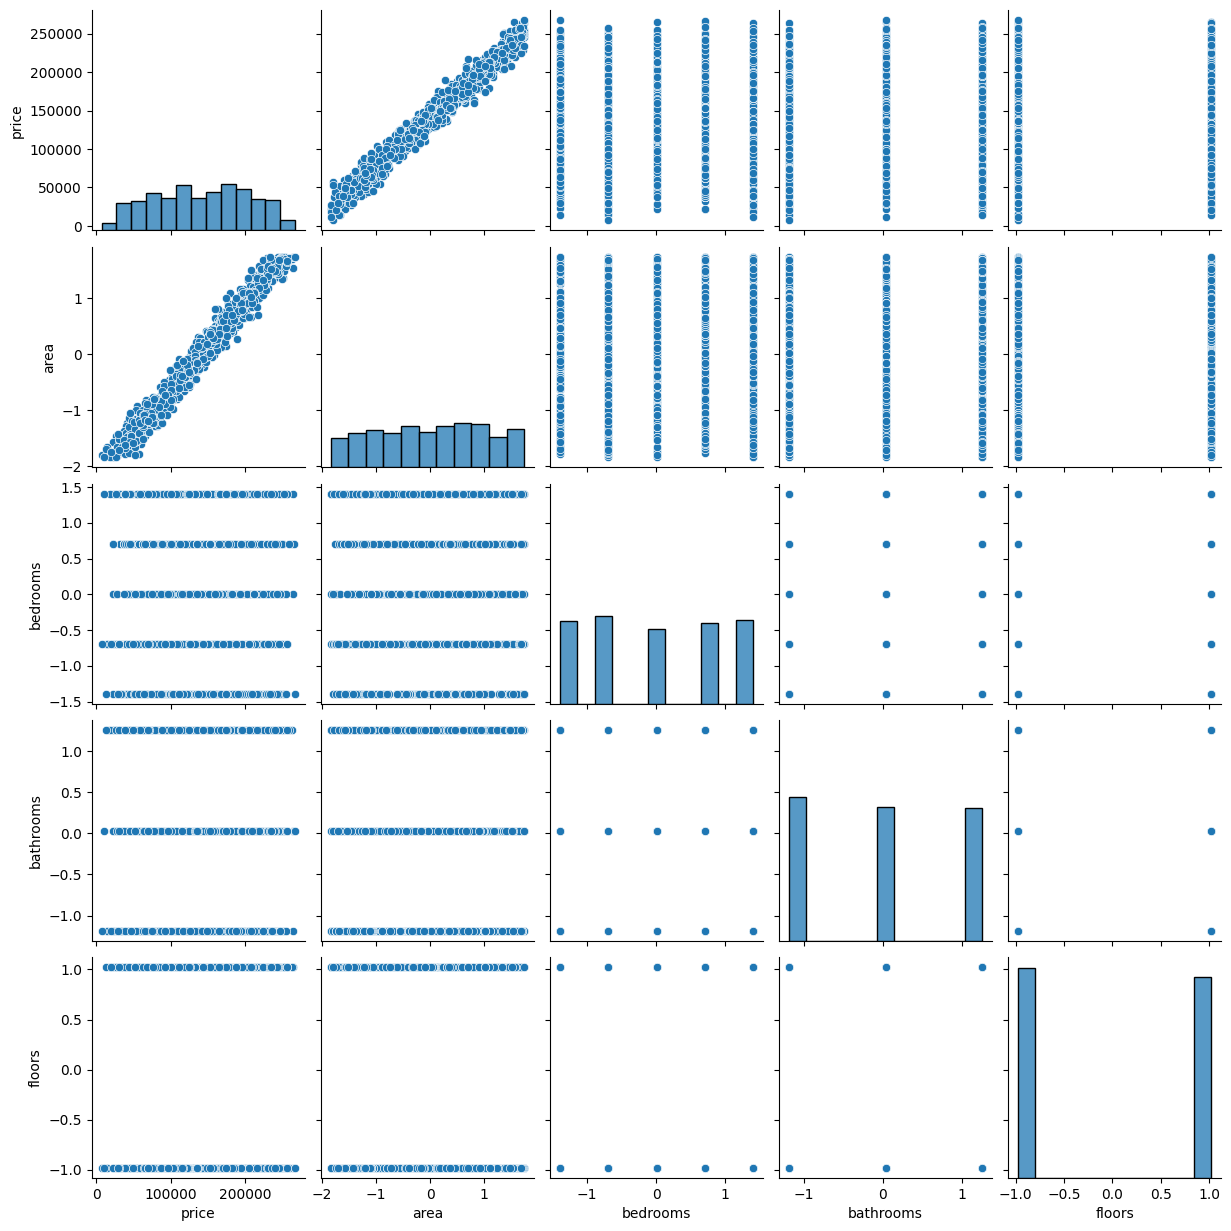

In [47]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'floors']])
plt.show()